In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# initialisations

C = 343        # [m/s] vitesse son air a 20 deg C
RHO = 1.2      # [kg/m3] masse volumique air
S = 1e-3       # [V/Pa] sensibilite micro
T = (0, 10e-3) # [s] instants initial et final de la simulation


DIM_ESP = 3   # dimension espace considere
NBR_MIC = 4   # nombre microphones
NBR_SRC = 2   # nombre sources sonores
NBR_TPS = 1000  # nombre d'instants consideres

# generateur nombres aleatoires reproductibles
rng = np.random.default_rng(2021)

# mic = rng.random((NBR_MIC, DIM_ESP))  # disposes aleatoirement
mic = np.linspace(rng.random(DIM_ESP), rng.random(DIM_ESP), NBR_MIC)
src = rng.random((NBR_SRC, DIM_ESP))
frq = np.array([440, 880])
# frq = TODO, sources sonores differentes en frequence

# vecteur temps
tps = np.linspace(*T, NBR_TPS)

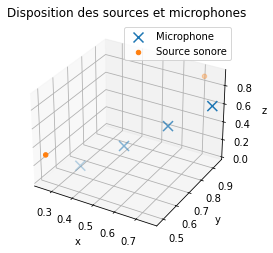

In [3]:
# Affichage selon la dimension de l'espace

if DIM_ESP == 2:
    fig = plt.figure(figsize=(4, 4))
    plt.scatter(mic[:, 0], mic[:, 1], marker='x')
    plt.scatter(src[:, 0], src[:, 1], marker='o')

elif DIM_ESP == 3:
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(mic[:, 0], mic[:, 1], mic[:, 2], marker='x', s=100)
    ax.scatter(src[:, 0], src[:, 1], src[:, 2], marker='o')
    ax.set_zlabel("z")

else:
    raise RuntimeError(f"ERREUR dimension de l'espace non valide : {DIM_ESP}")

plt.legend(["Microphone", "Source sonore"])
plt.title("Disposition des sources et microphones")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
def mic_out(m, s, f, t):
    """calcul de la sortie des microphones.

    Arguments :
        m -- positions des microphones. Dimension (NBR_MIC, DIM_ESP).
        s -- positions des sources. Dimension (NBR_SRC, DIM_ESP).
        f -- frequences des sources. Dimension (NBR_SRC).
        t -- instants consideres. Dimension (NBR_TPS).
    """

    # calcul des distances des microphones-sources.
    # dimension (NBR_SRC, NBR_MIC)
    ms_dist = np.linalg.norm(m - s[:, None], axis=-1)

    # formule cm 3 > pg 11/87 > eq (6).
    # dimension (NBR_SRC, NBR_MIC, NBR_TPS)
    out = 1j*S*RHO*f[:, None, None] / (2*ms_dist[:, :, None]) * (
          np.exp(2j*np.pi*f[:, None, None] * (t - ms_dist[:, :, None]/C)))

    # [s] retard de reception par rapport a la source
    # dimension (NBR_SRC, NBR_MIC)
    tau = ms_dist / C
    print(tau.min())

    # troncature des signaux pour prendre en compte le retard
    out[t < tau[:, :, None]] = 0

    # sommation de la contribution de chaque source
    # dimension (NBR_MIC, NBR_TPS)
    return np.sum(out.real, axis=0)

0.0008984772748437383


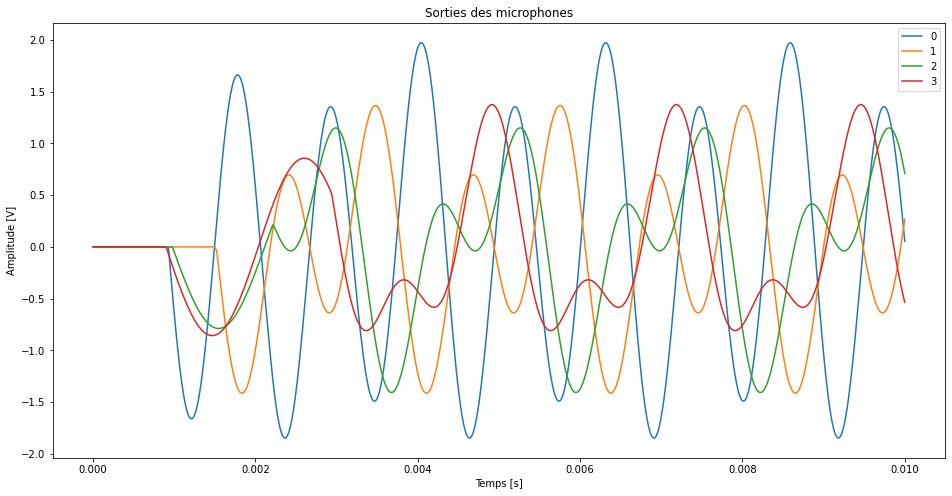

In [5]:
out = mic_out(mic, src, frq, tps)

# UN PLOT PAR SORTIE
# for i, o in enumerate(out):
#    plt.figure()
#    plt.title(f"Sortie microphone {i}")
#    plt.xlabel("temps [s]")
#    plt.ylabel("Amplitude [V]")
#    plt.plot(tps, o)
#    plt.show()

# UN PLOT POUR TOUTES LES SORTIES
plt.figure(figsize=(16, 8))
for o in out:
    plt.plot(tps, o)

plt.legend([i for i in range(NBR_MIC)])
plt.title("Sorties des microphones")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude [V]")

plt.show()

# ATTENTION
distances micros trop petites = pas de décalage